In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/luigi/data_science/db/base_datos_2008.csv')

In [2]:
df.dropna(inplace=True, subset=['ArrDelay', 'Distance', 'AirTime'])

sns.set(rc={'figure.figsize': (15,10)})

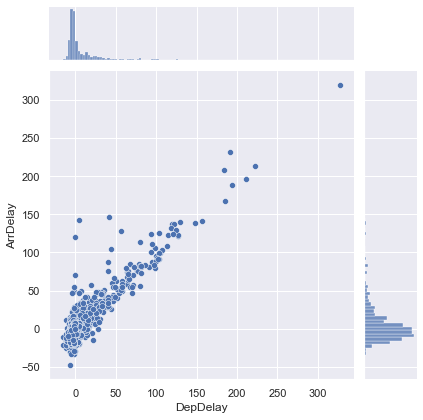

In [20]:
df2 = df[df['Origin'].isin(['ATL', 'HOU', 'IND'])].sample(frac=1).head(1000)

# Para crear una nube de puntos solo necesitamos relacionar dos columnas de un DataFrame
sns.jointplot(x=df2['DepDelay'], y=df2['ArrDelay'])
#plt.xlim([-100, 100])
#plt.ylim([-100, 100])

In [22]:
df3 = df2[np.abs(df2['DepDelay'])<40]
df3 = df3[np.abs(df3['ArrDelay'])<40]

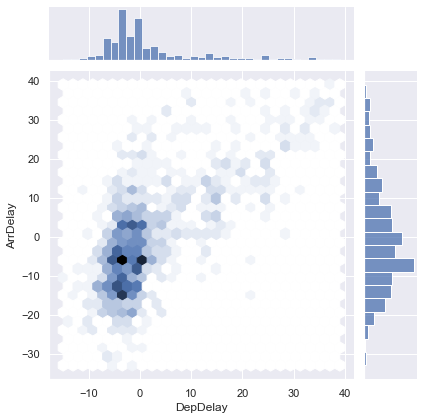

In [25]:
sns.jointplot(x=df3['DepDelay'], y=df3['ArrDelay'], kind='hex')

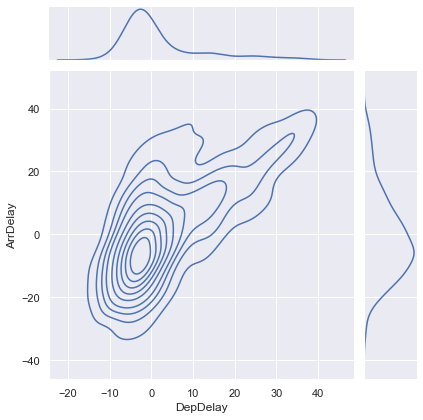

In [28]:
sns.jointplot(x=df3['DepDelay'], y=df3['ArrDelay'], kind='kde')

In [29]:
gb_df = pd.DataFrame(df2.groupby(['Origin', 'Month'], as_index=False)['DepDelay'].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,6.602740
1,ATL,2,20.680000
2,ATL,3,19.000000
3,ATL,4,7.382353
4,ATL,5,2.096774


In [30]:
data = gb_df.pivot('Month', 'Origin', 'DepDelay')
data

Origin,ATL,HOU,IND
Month,,,
1,6.602740,6.625000,5.363636
2,20.680000,17.000000,5.333333
3,19.000000,13.700000,42.750000
4,7.382353,16.000000,2.857143
5,2.096774,1.400000,4.857143
6,9.690141,7.833333,8.285714
7,18.942029,17.000000,10.142857
8,14.183099,15.625000,-5.000000
9,4.073529,-2.666667,-5.375000


<AxesSubplot:xlabel='Origin', ylabel='Month'>

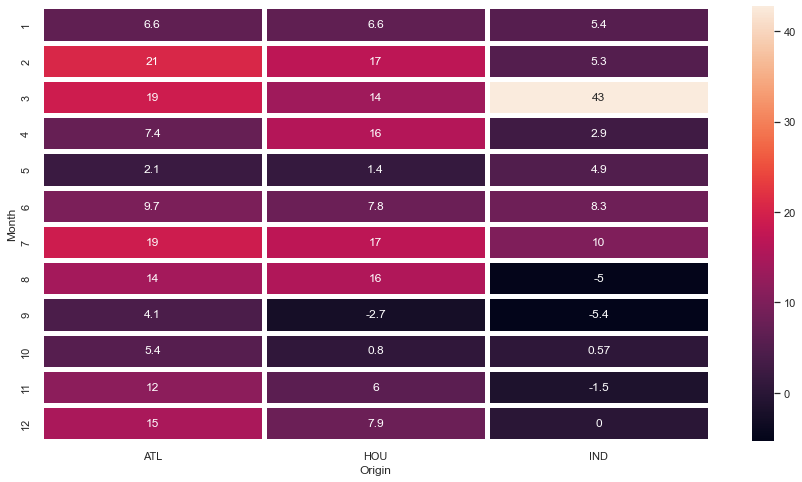

In [31]:
sns.set(rc={'figure.figsize': (15, 8)})
sns.heatmap(data=data, annot=True, linewidths=5)